In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
from tslearn.metrics import dtw_path

In [2]:
# 距離計算
def dist(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) ** 0.5

# 最小値を求める
def get_min(m0, m1, m2, i, j):
    if m0 < m1:
        if m0 < m2:
            return i - 1, j, m0
        else:
            return i - 1, j - 1, m2
    else:
        if m1 < m2:
            return i, j - 1, m1
        else:
            return i - 1, j - 1, m2

In [3]:
# DTW距離を求める関数
def dtw(x, y):
    # xのデータ数，yのデータ数をそれぞれTx,Tyに代入
    Tx = len(x)
    Ty = len(y)
    
    # C:各マスの累積コスト，　B：最小コストの行/列番号
    C = np.zeros((Tx, Ty))
    B = np.zeros((Tx, Ty, 2), int)
    
    # 一番初めのマスのコストを，xとyのそれぞれ一番初めの値にする
    C[0, 0] = dist(x[0], y[0])
    
    # 動的計画法を用いる
    # 左下のマスからスタートし，各マスに到達するため最小の累積コストを1マスずつ求める
    
    # 境界条件：両端が左下と右上にあること
    # 単調性：左下から始まり，右，上，右上のいずれかにしか進まないこと
    # 連続性：繋がっていること
    
    # 一番下の行は，真っ直ぐ右にコストが累積される
    for i in range(Tx):
        C[i, 0] = C[i - 1, 0] + dist(x[i], y[0])
        B[i, 0] = [i - 1, 0]
        
    # 同様に一番左の列は，真っ直ぐ上にコストが累積される
    for j in range(1, Ty):
        C[0, j] = C[0, j - 1] + dist(x[0], y[j])
        B[0, j] = [0, j - 1]
        
    # その他のマスの累積コストを求める
    for i in range(1, Tx):
        for j in range(1, Ty):
            pi, pj, m = get_min(C[i - 1, j],
                                C[i, j - 1],
                                C[i - 1, j - 1],
                                i, j)
            # get_minで返ってきた最小コストを累積コストに足す
            C[i, j] = dist(x[i], y[j]) + m
            # get_minで返ってきた最小コストの行/列番号を保持
            B[i, j] = [pi, pj]
    # 最終的な右上（最終の到達点）のコスト
    cost = C[-1, -1]
    
    path = [[Tx - 1, Ty - 1]]
    
    # 逆順にたどることでパスを求める
    i = Tx - 1
    j = Ty - 1
    
    while((B[i, j][0] != 0) or (B[i, j][1] != 0)):
        path.append(B[i, j])
        i, j = B[i, j].astype(int)
    path.append([0, 0])
    return np.array(path), cost

In [4]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Desktop/data1.csv", encoding="shift-jis", usecols=[0,1]).values
inputData = pd.read_csv("/Users/yuki-f/Desktop/data2.csv", encoding="shift-jis", usecols=[0,1]).values


0.762266327352199


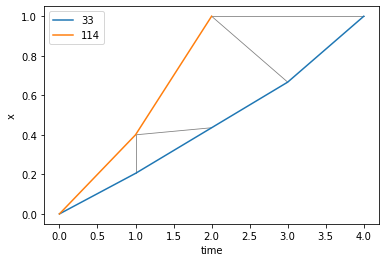

FileNotFoundError: [Errno 2] No such file or directory: './plotTsData/33-114-x.png'

In [5]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
print(cost)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="33")
plt.plot(inputData[:,0],label="114")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/33-114-x.png")
pathes.append(path)

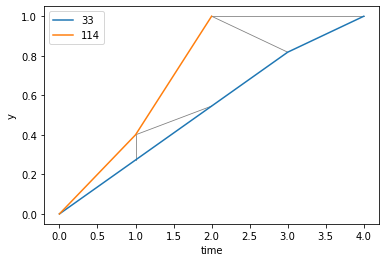

FileNotFoundError: [Errno 2] No such file or directory: './plotTsData/33-114-y.png'

In [6]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="33")
plt.plot(inputData[:,1],label="114")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/33-114-y.png")
pathes.append(path)

In [8]:
cost

0.762266327352199

In [211]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99161197.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99232019.csv", encoding="shift-jis", usecols=[4,5]).values


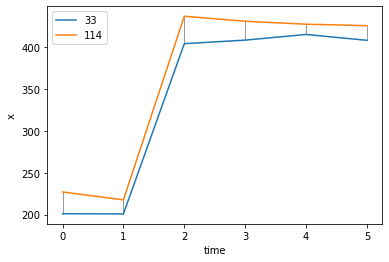

In [212]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="33")
plt.plot(inputData[:,0],label="114")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/33-114-x.png")
pathes.append(path)

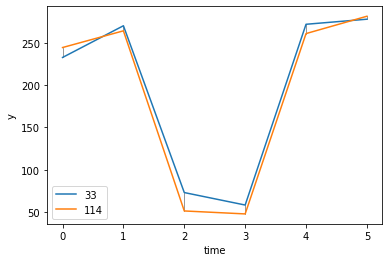

In [214]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="33")
plt.plot(inputData[:,1],label="114")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/33-114-y.png")
pathes.append(path)

In [251]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99107978.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99143099-2.csv", encoding="shift-jis", usecols=[4,5]).values


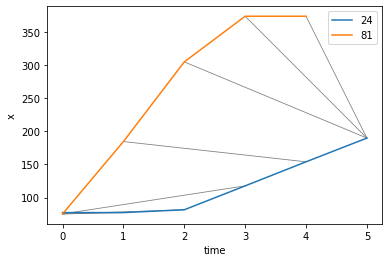

In [252]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="24")
plt.plot(inputData[:,0],label="81")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/24-81-x.png")
pathes.append(path)

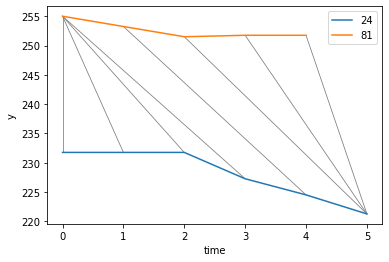

In [253]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="24")
plt.plot(inputData[:,1],label="81")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/24-81-y.png")
pathes.append(path)

In [254]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99123462.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99124029.csv", encoding="shift-jis", usecols=[4,5]).values


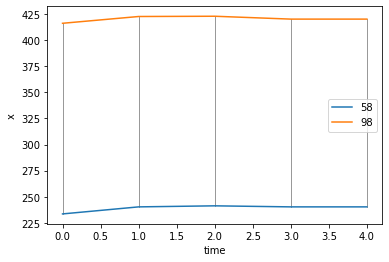

In [255]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="58")
plt.plot(inputData[:,0],label="98")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/58-98-x.png")
pathes.append(path)

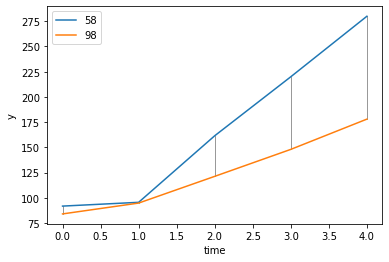

In [256]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="58")
plt.plot(inputData[:,1],label="98")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/58-98-y.png")
pathes.append(path)

In [257]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99145792-2.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99120074.csv", encoding="shift-jis", usecols=[4,5]).values


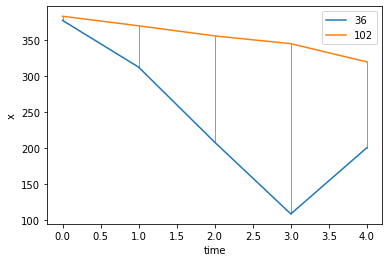

In [258]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="36")
plt.plot(inputData[:,0],label="102")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/36-102-x.png")
pathes.append(path)

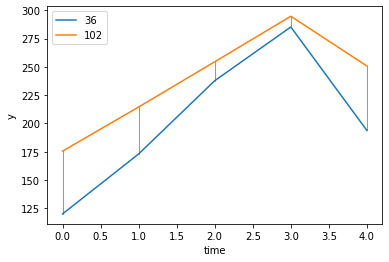

In [259]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="36")
plt.plot(inputData[:,1],label="102")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/36-102-y.png")
pathes.append(path)

In [215]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99236475.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99161197-2.csv", encoding="shift-jis", usecols=[4,5]).values


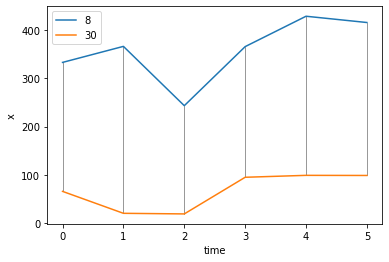

In [216]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="8")
plt.plot(inputData[:,0],label="30")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/8-30-x.png")
pathes.append(path)

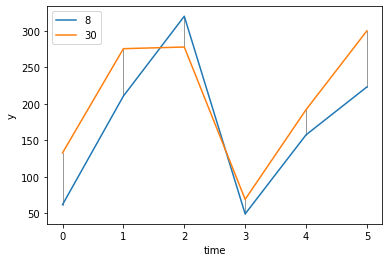

In [218]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="8")
plt.plot(inputData[:,1],label="30")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/8-30-y.png")
pathes.append(path)

In [219]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99145792.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99120074.csv", encoding="shift-jis", usecols=[4,5]).values


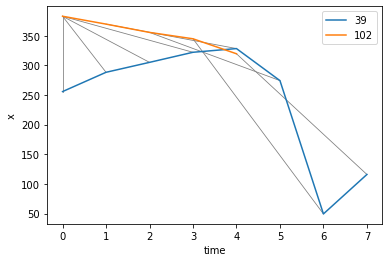

In [221]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="39")
plt.plot(inputData[:,0],label="102")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/39-102-x.png")
pathes.append(path)

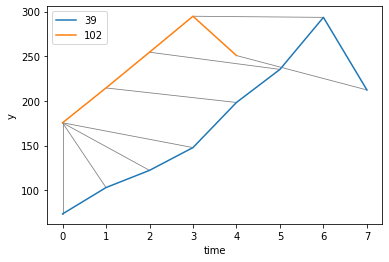

In [222]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="39")
plt.plot(inputData[:,1],label="102")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/39-102-y.png")
pathes.append(path)

In [224]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99236475-2.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99120074-2.csv", encoding="shift-jis", usecols=[4,5]).values


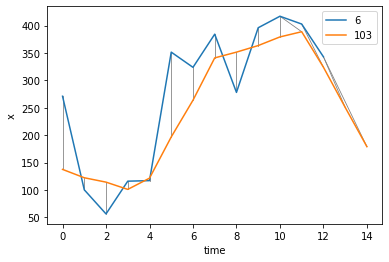

In [225]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="6")
plt.plot(inputData[:,0],label="103")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/6-103-x.png")
pathes.append(path)

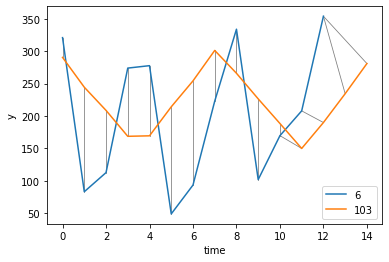

In [226]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="6")
plt.plot(inputData[:,1],label="103")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/6-103-y.png")
pathes.append(path)

In [227]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99193703.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99203967.csv", encoding="shift-jis", usecols=[4,5]).values


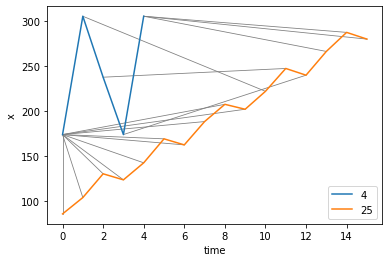

In [228]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="4")
plt.plot(inputData[:,0],label="25")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/4-25-x.png")
pathes.append(path)

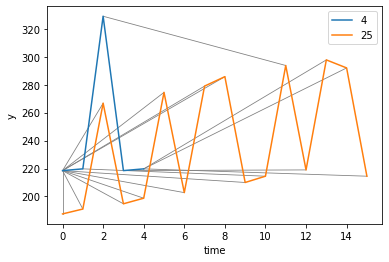

In [229]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="4")
plt.plot(inputData[:,1],label="25")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/4-25-y.png")
pathes.append(path)

In [231]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99116915.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99120562.csv", encoding="shift-jis", usecols=[4,5]).values


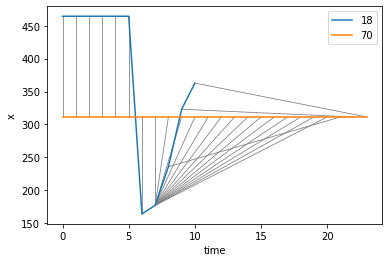

In [232]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="18")
plt.plot(inputData[:,0],label="70")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/18-70-x.png")
pathes.append(path)

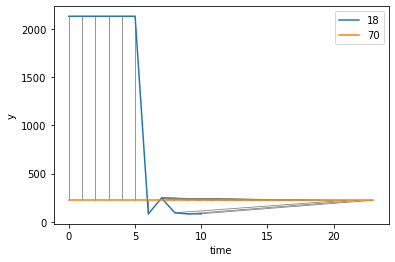

In [234]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="18")
plt.plot(inputData[:,1],label="70")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/18-70-y.png")
pathes.append(path)

In [236]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99120562.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99143099.csv", encoding="shift-jis", usecols=[4,5]).values
 

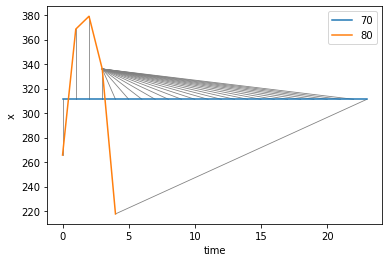

In [237]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="70")
plt.plot(inputData[:,0],label="80")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/70-80-x.png")
pathes.append(path)

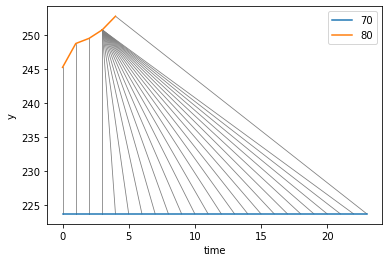

In [238]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="70")
plt.plot(inputData[:,1],label="80")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/70-80-y.png")
pathes.append(path)

In [239]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99213756.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99141356.csv", encoding="shift-jis", usecols=[4,5]).values
 

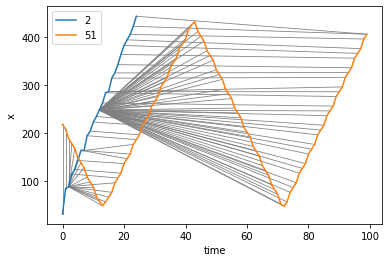

In [241]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="2")
plt.plot(inputData[:,0],label="51")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/2-51-x.png")
pathes.append(path)

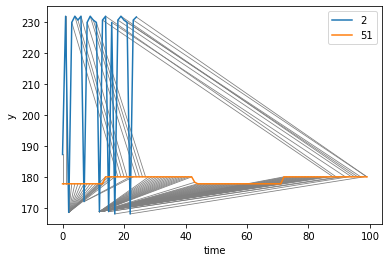

In [242]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="2")
plt.plot(inputData[:,1],label="51")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/2-51-y.png")
pathes.append(path)

In [244]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99232366.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99141356.csv", encoding="shift-jis", usecols=[4,5]).values
 

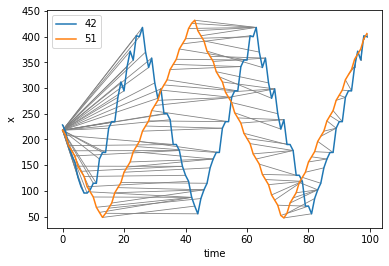

In [245]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="42")
plt.plot(inputData[:,0],label="51")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/42-51-x.png")
pathes.append(path)

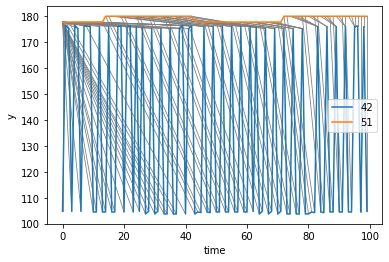

In [246]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="42")
plt.plot(inputData[:,1],label="51")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/42-51-y.png")
pathes.append(path)

In [248]:
# データの準備
data = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99141356.csv", encoding="shift-jis", usecols=[4,5]).values
inputData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/ImageRecognition/99120562-2.csv", encoding="shift-jis", usecols=[4,5]).values
 

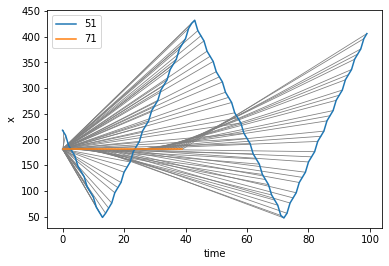

In [249]:
# x座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][0], inputData[line[1]][0]], linewidth=0.8, c="gray")
plt.plot(data[:,0],label="51")
plt.plot(inputData[:,0],label="71")
plt.xlabel("time")
plt.ylabel("x")
plt.legend()
plt.show()
fig.savefig("./plotTsData/51-71-x.png")
pathes.append(path)

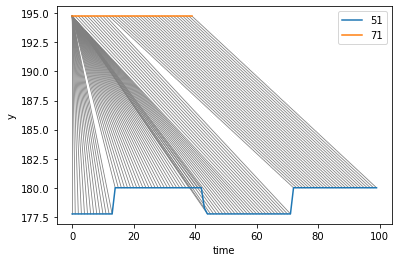

In [250]:
# y座標の変化
pathes = []
path, cost = dtw(data, inputData)
fig = plt.figure()
for line in path:
    plt.plot(line, [data[line[0]][1], inputData[line[1]][1]], linewidth=0.8, c="gray")
plt.plot(data[:,1],label="51")
plt.plot(inputData[:,1],label="71")
plt.xlabel("time")
plt.ylabel("y")
plt.legend()
plt.show()
fig.savefig("./plotTsData/51-71-y.png")
pathes.append(path)

In [278]:
histData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/DTW/dtw4.csv", encoding="shift-jis", usecols=[3])

In [279]:
histData

,dtw
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
14156,100.946424
14157,100.946424
14158,100.946424
14159,100.946424


(array([7053., 2146.,  662., 1014., 1392., 1344.,  356.,  128.,   44.,
          22.]),
 array([  0.        ,  10.09464239,  20.18928478,  30.28392717,
         40.37856956,  50.47321195,  60.56785434,  70.66249673,
         80.75713912,  90.85178151, 100.9464239 ]),
 <BarContainer object of 10 artists>)

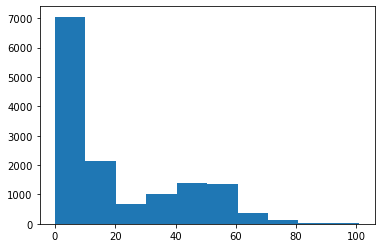

In [280]:
plt.hist(histData)

In [454]:
dist = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/DTW/dtw4.csv", usecols=[1,2,3])

In [455]:
dist

,i,j,dtw
0,0,0,0.000000
1,39,39,0.000000
2,40,40,0.000000
3,41,41,0.000000
4,42,42,0.000000
...,...,...,...
14156,105,90,100.946424
14157,105,71,100.946424
14158,105,70,100.946424
14159,105,59,100.946424


In [456]:
lastData = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/DTW/lastData4.csv", usecols=[1])

In [457]:
lastData

,prjId_sprite_sprNum
0,99176406_Squirrel_0
1,99176406_Squirrel_0
2,99176406_Squirrel_0
3,99176406_Squirrel_0
4,99176406_Squirrel_0
...,...
3210,99219854_Dog2_3
3211,99219854_Dog2_3
3212,99219854_Dog2_3
3213,99219854_Dog2_3


In [462]:
counts = lastData.value_counts().rename_axis('prjId_sprite_sprNum').reset_index(name='counts')

In [463]:
counts

,prjId_sprite_sprNum,counts
0,99165685_Cassy Dance_0,100
1,99131793_Champ99_0,100
2,99141356_Cat_0,100
3,99232366_Parrot_0,100
4,99225925_Parrot_0,100
...,...,...
114,99147856_Pencil_2,5
115,99157722_Cat_15,5
116,99157722_Cat_2,5
117,99120074_Cat_1,5


In [481]:
output = pd.DataFrame(columns=["dtw", "count"])
for index, row in dist.iterrows():
    i = int(row["i"])
    j = int(row["j"])
    addRow = pd.DataFrame(columns=["dtw", "count"])
    # print(counts.at[i, "counts"])
    if counts.at[i, "counts"] >= counts.at[j, "counts"]:
        output = output.append(pd.DataFrame([[row["dtw"], counts.at[i, "counts"]]], columns=["dtw", "count"]))
    else:
        output = output.append(pd.DataFrame([[row["dtw"], counts.at[j, "counts"]]], columns=["dtw", "count"]))
output.to_csv("graph.csv")

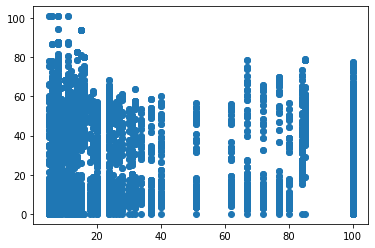

In [483]:
fig = plt.figure()
distDataa = pd.read_csv("/Users/yuki-f/Documents/SocSEL/Research/DTW/graph.csv")
plt.scatter(distDataa["count"], distDataa["dtw"])